# Introduction
This tutorial is created with a lot of code and organization borrowed from Nev Acar's [eigenfaces github repo](https://github.com/n0acar/eigenfaces). You can check your work with the results from this repo but please refrain from copying the answers directly when first trying this out. His further explanation on how PCA works as a dimensionality reduction tool can be found [here](https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184). (Again please refer to this after you have solved the prompts below.)

In this tutorial, you'll be working with a cropped version of the [Labeled Faces in the Wild dataset](https://conradsanderson.id.au/lfwcrop/). These are a bunch of greyscale face images that were cropped to be centered around the face. In this notebook, you'll be using Principal Component Analysis to determine the "Principal Components of Faces" otherwise known as **eigenfaces**. In the case of working with faces, each principal component vector, otherwise known as an *eigenvector*, can be visualized back into a face image. When you visualize them, you'll notice that they still kind of look like faces but with interesting properties. These **eigenfaces** will be the the axes that capture the most variance of the data. Visualize them to get a sense of what that means.

## First start by importing the required packages.
Here, we're going to use the Principal Components Analysis (PCA) package from the Python library [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform). Later on, you'll have the option to implement PCA on your own. But first, it'll be easier to use something that is already written.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.decomposition import PCA  # this imports the PCA class from scikit-learn

We're also going to connect to google drive for this notebook. This way we won't have to keep uploading data.

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


The function below was written by Nev Acar and visualizes a set of images in subplots. It's quite helpful!

In [8]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

# Step 1: Visualize the data
Run this cell to visualize the data that you are working with. Look at some of the images.

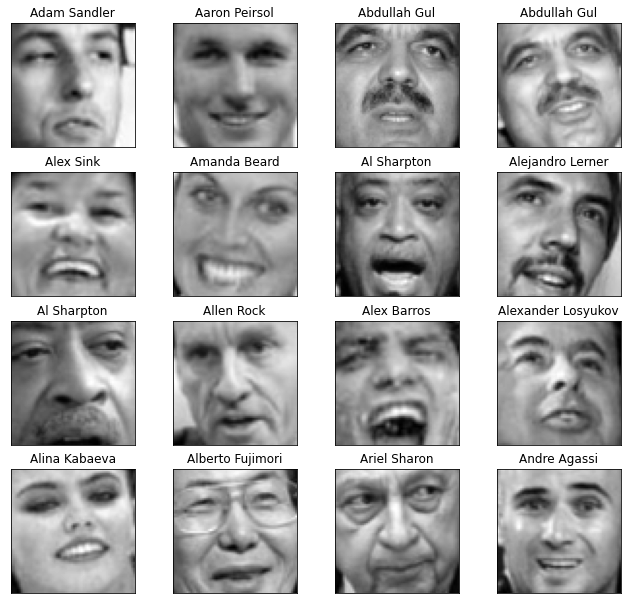

In [9]:
dir='/content/drive/My Drive/Colab Notebooks/lfwcrop_grey/faces'
celebrity_photos=os.listdir(dir)[1:200]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
n_samples, h, w = images.shape
plot_portraits(images, celebrity_names, h, w, n_row=4, n_col=4)

## Step 2: Run PCA on the data
This part will require writing code. Let's break this down step by step.

Initialize the PCA class with the number of components you want to project down to. 
You are working with hundreds of images. That means you are working with data that is of size (n_images x h x width), or (200 x 64 x 64 = 819,200). That's really big. If we project down to a smaller number of dimensions, say 20, that'll reduce our data size to (20 x 64 x 64 = 81,920), or a reduction by a factor of 10! Additionally, if we further reduce the components to 2, we can visualize this on  a 2D scatter plot. Let's try this after.

First, set the number of components to 20 and initialize PCA to reduce to 20 components.

In [11]:
n_components = 20
images.shape
x=images.reshape(n_samples, h*w)
pca = PCA(n_components=n_components)


# reshape images to a matrix of size (n_samples, h*w)

# initalize the PCA object

Now, fit the PCA object to the data.

In [12]:
# fit PCA object to data
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Then, get the components of the resulting PCA object and reshape it to be `(n_components, h, w)`.

In [16]:
# get components of the PCA object and reshape it to be (n_components, h, w)
eigenfaces = pca.components_
eigenfaces.shape
eigenfaces = eigenfaces.reshape(n_components, h, w)

Now, run the cell below and lets visualize the resulting **eigenfaces**.

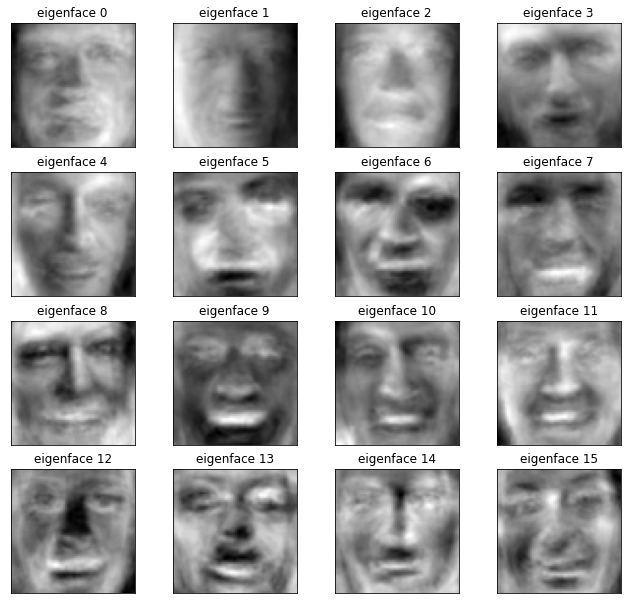

In [17]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4)

What do you see? 

Now, below, print how much variance is captured by each component.

In [18]:
# print explained variance ratio of the PCA decomposition
print(pca.explained_variance_ratio_)

[0.27339855 0.15275738 0.06839432 0.04491747 0.03380165 0.02532251
 0.0234807  0.01992748 0.01765816 0.01663211 0.01392599 0.01277149
 0.01116487 0.01009992 0.00927954 0.00919017 0.00871883 0.00822368
 0.00803006 0.00773223]


Now, we can try to visualize this data in a lower-dimensional space (along the principal components). Let's do this by projecting to 2 components. 

First use PCA to reduce the data down to 2 components.

In [19]:
n_components = 2
images.shape
x=images.reshape(n_samples, h*w)
pca = PCA(n_components=n_components)
# reshape images to a matrix of size (n_samples, h*w)

# initalize the PCA object

Now, we're going to project the data (the faces) we have, such that the dimensions of the data are (n_samples, n_dims). You can do this by taking the dot product of the images with the pca components. The `np.dot` function will be helpful here.

In [22]:
# take dot product of the data with the PCA components
pca.fit(x)
eigenfaces = pca.components_
projection = np.dot(x, eigenfaces.T)

In [23]:
projection.shape

(199, 2)

Now visualize the results using a scatter plot.

Text(0, 0.5, 'PC 1 (eigenface 1)')

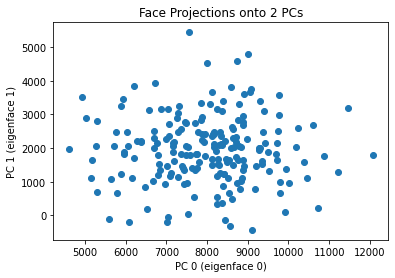

In [24]:
plt.title('Face Projections onto 2 PCs')
plt.scatter(projection[:,0], projection[:,1])
plt.xlabel('PC 0 (eigenface 0)')
plt.ylabel('PC 1 (eigenface 1)')

Visualize the two eigenfaces (the two PC components) below like you did before. Does the distribution above make sense when looking at these two eigenfaces?

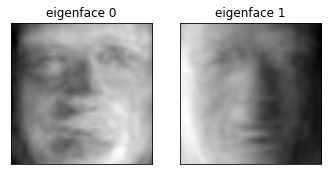

In [26]:
# get components of the PCA object and reshape it to be (n_components, h, w)
eigenfaces = pca.components_
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 1, 2)

Bonus: Try writing your own PCA implementation and see how it compares to the Scikit-learn version. Compare your results with the one you used above. You can refer to Nev Acar's implementation as well. He uses the numpy linear algebra library [singular value decomposition](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) solver. Hint: PCA works best when the data has zero mean, otherwise known as "centered" data. Therefore, subtract the mean from the data before running PCA on it.

In [ ]:
def pca():
    n_samples, n_features = X.shape
    # subject mean from data
    # get matric decomposition using np svd
    components = 
    projected = 
    
    return projected, components

In [ ]:
n_components = 
X = images.reshape(n_samples, h*w)
P, C = pca()
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4)